<h1><br>BREAST CANCER PREDICTION USING NEUTRAL NETWORK</br><h1>

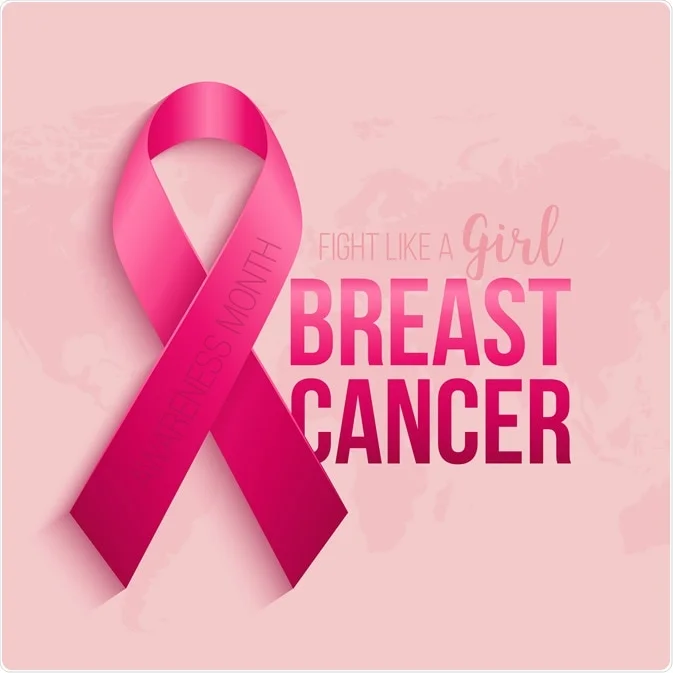

**ABOUT DATASET:**

**Domain Exploration**

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

**Exploratory Data Analytics / Root Cause Analytics**

**1)Domain Exploration**

Understand the relevant business process, business impact Common challenges and beleifs Sources of data and external factors

**2)Data Collection and Data Exploration**

Collect data from multiple units of business, prepare the dataset Perform a generic exploration on data to identify common challenges in data quality

**3)Data Cleaning**

Handling duplicates, unwanted columns, missing values, outliers

**4)EDA / RCA**

* Data Visualization

* Univariate Analysis, Bivariate Analysis, Multivariate Analysis, Statistical methods

* Correlation Analysis ANOVA, Chi Square Test,

**Data Collection and Data Exploration**

**IMPORTING THE LIBRARY**

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets

**IMPORTING THE DATASET**

In [129]:
#import the dataset from uci 
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [130]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [131]:
#converting the data into dataframe
df = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [132]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [133]:
#adding the label column into dataset
df['label'] = breast_cancer_dataset.target

In [134]:
df.shape

(569, 31)

In [135]:
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [137]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


**Data Cleaning**

In [138]:
#to check the duplicates
df.duplicated().sum()

0

In [139]:
#to check the null values
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [140]:
df["label"].value_counts()

1    357
0    212
Name: label, dtype: int64

In [141]:
df.groupby("label").mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


**SEPERATING THE X AND Y VARIABLE**

In [142]:
x=df.drop(["label"],axis=1)

In [143]:
x

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [144]:
y=df["label"]

In [145]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64

**SPILTTING THE DATASET INTO TRAIN AND TEST**

In [146]:
from sklearn. model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

**StandardScaler:**

Python sklearn library offers us with StandardScaler() function to standardize the data values into a standard format. Syntax: object = StandardScaler() object. fit_transform(data) According to the above syntax, we initially create an object of the StandardScaler() function.

In [147]:
from sklearn.preprocessing import StandardScaler
sts=StandardScaler()
x_train_std=sts.fit_transform(x_train)
x_test_std=sts.fit_transform(x_test)

<h3> NEUTRAL NETWORK</h3>

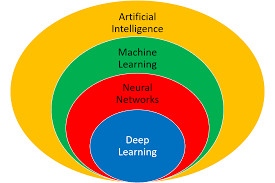

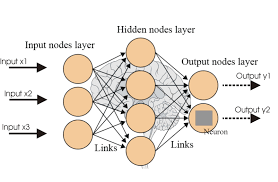

**What is a neural network?**

A neural network is a method in artificial intelligence that teaches computers to process data in a way that is inspired by the human brain. It is a type of machine learning process, called deep learning, that uses interconnected nodes or neurons in a layered structure that resembles the human brain. It creates an adaptive system that computers use to learn from their mistakes and improve continuously. Thus, artificial neural networks attempt to solve complicated problems, like summarizing documents or recognizing faces, with greater accuracy.

**Why are neural networks important?**

Neural networks can help computers make intelligent decisions with limited human assistance. This is because they can learn and model the relationships between input and output data that are nonlinear and complex. For instance, they can do the following tasks.

Make generalizations and inferences
Neural networks can comprehend unstructured data and make general observations without explicit training. For instance, they can recognize that two different input sentences have a similar meaning:

can you tell me how to make the payment?
How do I transfer money?
A neural network would know that both sentences mean the same thing. Or it would be able to broadly recognize that Baxter Road is a place, but Baxter Smith is a person’s name.

**What are neural networks used for?**

Neural networks have several use cases across many industries, such as the following:

* Medical diagnosis by medical image classification
Targeted marketing by social network filtering and behavioral data analysis
* Financial predictions by processing historical data of financial instruments
* Electrical load and energy demand forecasting
Process and quality control
* Chemical compound identification
We give four of the important applications of neural networks below.

**Computer vision**

Computer vision is the ability of computers to extract information and insights from images and videos. With neural networks, computers can distinguish and recognize images similar to humans. Computer vision has several applications, such as the following:

Visual recognition in self-driving cars so they can recognize road signs and other road users
Content moderation to automatically remove unsafe or inappropriate content from image and video archives
Facial recognition to identify faces and recognize attributes like open eyes, glasses, and facial hair
Image labeling to identify brand logos, clothing, safety gear, and other image details

**Speech recognition**

Neural networks can analyze human speech despite varying speech patterns, pitch, tone, language, and accent. Virtual assistants like Amazon Alexa and automatic transcription software use speech recognition to do tasks like these:

Assist call center agents and automatically classify calls
Convert clinical conversations into documentation in real time
Accurately subtitle videos and meeting recordings for wider content reach


**Natural language processing**

Natural language processing (NLP) is the ability to process natural, human-created text. Neural networks help computers gather insights and meaning from text data and documents. NLP has several use cases, including in these functions:

Automated virtual agents and chatbots
Automatic organization and classification of written data
Business intelligence analysis of long-form documents like emails and forms
Indexing of key phrases that indicate sentiment, like positive and negative comments on social media
Document summarization and article generation for a given topic
Recommendation engines
Neural networks can track user activity to develop personalized recommendations. They can also analyze all user behavior and discover new products or services that interest a specific user. For example, Curalate, a Philadelphia-based startup, helps brands convert social media posts into sales. Brands use Curalate’s intelligent product tagging (IPT) service to automate the collection and curation of user-generated social content. IPT uses neural networks to automatically find and recommend products relevant to the user’s social media activity. Consumers don't have to hunt through online catalogs to find a specific product from a social media image. Instead, they can use Curalate’s auto product tagging to purchase the product with ease.

**How do neural networks work?**

The human brain is the inspiration behind neural network architecture. Human brain cells, called neurons, form a complex, highly interconnected network and send electrical signals to each other to help humans process information. Similarly, an artificial neural network is made of artificial neurons that work together to solve a problem. Artificial neurons are software modules, called nodes, and artificial neural networks are software programs or algorithms that, at their core, use computing systems to solve mathematical calculations.

Simple neural network architecture
A basic neural network has interconnected artificial neurons in three layers:

**Input Layer**

Information from the outside world enters the artificial neural network from the input layer. Input nodes process the data, analyze or categorize it, and pass it on to the next layer.

**Hidden Layer**

Hidden layers take their input from the input layer or other hidden layers. Artificial neural networks can have a large number of hidden layers. Each hidden layer analyzes the output from the previous layer, processes it further, and passes it on to the next layer.

**Output Layer**

The output layer gives the final result of all the data processing by the artificial neural network. It can have single or multiple nodes. For instance, if we have a binary (yes/no) classification problem, the output layer will have one output node, which will give the result as 1 or 0. However, if we have a multi-class classification problem, the output layer might consist of more than one output node.

**Deep neural network architecture**

Deep neural networks, or deep learning networks, have several hidden layers with millions of artificial neurons linked together. A number, called weight, represents the connections between one node and another. The weight is a positive number if one node excites another, or negative if one node suppresses the other. Nodes with higher weight values have more influence on the other nodes.
Theoretically, deep neural networks can map any input type to any output type. However, they also need much more training as compared to other machine learning methods. They need millions of examples of training data rather than perhaps the hundreds or thousands that a simpler network might need.

**IMPORTING THE TENSORFLOW AND KERAS**

In [148]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

**DEVELOPING THE MODEL**

In [149]:
from keras.api._v2.keras import layers
model=keras.Sequential([
     
     keras.layers.Flatten(input_shape=(30,)),
     layers.Dense(64,activation='relu'),
     layers.Dropout(0.30),
     layers.BatchNormalization(),
     layers.Dense(32,activation='relu'),
     layers.Dropout(0.30),
     layers.BatchNormalization(),
     layers.Dense(2,activation="sigmoid")
])

In [150]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [151]:
history = model.fit(x_train_std, y_train, validation_split=0.1, epochs=25)

Epoch 1/25
13/13 [==============================] - 2s 27ms/step - loss: 0.8426 - accuracy: 0.5917 - val_loss: 0.3577 - val_accuracy: 0.9130
Epoch 2/25
13/13 [==============================] - 0s 5ms/step - loss: 0.5066 - accuracy: 0.7604 - val_loss: 0.2720 - val_accuracy: 0.9130
Epoch 3/25
13/13 [==============================] - 0s 7ms/step - loss: 0.3324 - accuracy: 0.8411 - val_loss: 0.2222 - val_accuracy: 0.9565
Epoch 4/25
13/13 [==============================] - 0s 6ms/step - loss: 0.2581 - accuracy: 0.9022 - val_loss: 0.1892 - val_accuracy: 0.9348
Epoch 5/25
13/13 [==============================] - 0s 7ms/step - loss: 0.2282 - accuracy: 0.9046 - val_loss: 0.1684 - val_accuracy: 0.9348
Epoch 6/25
13/13 [==============================] - 0s 7ms/step - loss: 0.2009 - accuracy: 0.9218 - val_loss: 0.1534 - val_accuracy: 0.9348
Epoch 7/25
13/13 [==============================] - 0s 7ms/step - loss: 0.1748 - accuracy: 0.9389 - val_loss: 0.1388 - val_accuracy: 0.9565
Epoch 8/25
13/13 [=

**EDA**

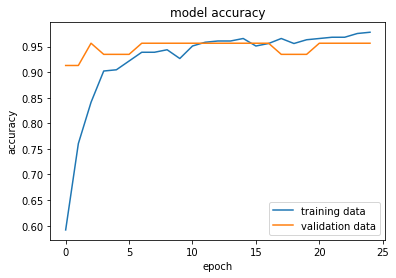

In [152]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

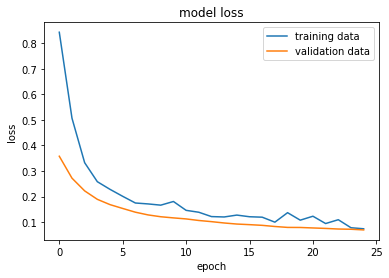

In [153]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [154]:
print(x_test_std)

[[-0.08700339 -1.47192915 -0.10537391 ... -0.26629174 -1.09776353
  -0.65597459]
 [ 0.19989092  0.03577342  0.1706179  ...  0.44844054  0.06066588
   0.02108157]
 [-1.28858427 -0.21847659 -1.30667757 ... -1.41981535  0.19788632
  -0.31050377]
 ...
 [ 0.67523542  0.61546345  0.70329853 ...  1.36221218  1.000987
   0.62759948]
 [ 0.20832899  1.5866985   0.10942329 ... -1.35965118 -1.95719681
  -1.62740299]
 [ 0.78774299  0.03068842  0.84293725 ...  2.03773974  0.27299646
   0.34822356]]


**EVALUATING THE MODEL**

In [155]:
loss,accuracy=model.evaluate(x_test_std,y_test)
print(accuracy)

4/4 [==============================] - 0s 4ms/step - loss: 0.0890 - accuracy: 0.9649
0.9649122953414917


In [156]:
print(x_test_std.shape)
print(x_test_std)

(114, 30)
[[-0.08700339 -1.47192915 -0.10537391 ... -0.26629174 -1.09776353
  -0.65597459]
 [ 0.19989092  0.03577342  0.1706179  ...  0.44844054  0.06066588
   0.02108157]
 [-1.28858427 -0.21847659 -1.30667757 ... -1.41981535  0.19788632
  -0.31050377]
 ...
 [ 0.67523542  0.61546345  0.70329853 ...  1.36221218  1.000987
   0.62759948]
 [ 0.20832899  1.5866985   0.10942329 ... -1.35965118 -1.95719681
  -1.62740299]
 [ 0.78774299  0.03068842  0.84293725 ...  2.03773974  0.27299646
   0.34822356]]


In [157]:
y_pred=model.predict(x_test_std)

4/4 [==============================] - 0s 4ms/step


In [158]:
print(y_pred.shape)
print(y_pred)

(114, 2)
[[2.06276312e-01 8.88908267e-01]
 [2.25881204e-01 7.64783740e-01]
 [8.02163109e-02 9.85386670e-01]
 [9.97052133e-01 4.48990795e-05]
 [2.21465886e-01 8.40326846e-01]
 [9.40589905e-01 3.26908054e-03]
 [2.18074754e-01 9.13837314e-01]
 [5.30515946e-02 9.87666488e-01]
 [7.51930475e-02 9.72740948e-01]
 [1.13102309e-01 9.76456344e-01]
 [5.61841547e-01 4.62961406e-01]
 [2.31748521e-01 9.14148688e-01]
 [3.96324337e-01 8.85177553e-01]
 [1.76155180e-01 8.88361633e-01]
 [1.15665838e-01 9.74933982e-01]
 [8.52030873e-01 8.98346752e-02]
 [1.09191343e-01 9.73553538e-01]
 [4.92467321e-02 9.89598453e-01]
 [6.93294927e-02 9.80663359e-01]
 [8.97703409e-01 4.41695657e-03]
 [8.42437595e-02 9.94455576e-01]
 [6.09019101e-02 9.87094700e-01]
 [7.38341212e-02 9.79961455e-01]
 [6.04698136e-02 9.89003599e-01]
 [1.44879088e-01 9.33659673e-01]
 [8.79202008e-01 2.68097352e-02]
 [1.07534774e-01 9.62406695e-01]
 [1.98780462e-01 9.27296817e-01]
 [8.63120377e-01 6.70688450e-02]
 [9.06331480e-01 2.67045684e-02]
 

In [159]:
actual_y_pred=[np.argmax(i) for i in y_pred]
print(actual_y_pred)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0]


**Building the predictive system**

In [165]:
input_data = (11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)

# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = sts.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('The tumor is Malignant')

else:
  print('The tumor is Benign')

1/1 [==============================] - 0s 33ms/step
[[0.08812614 0.98001814]]
[1]
The tumor is Benign


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**PREPARING THE PICKLE FILE**

In [167]:
import pickle
result="breast_cancer.pkl"
pickle.dump(model,open("breast_cancer.pkl",'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......batch_normalization
.........vars
............0
............1
............2
............3
......batch_normalization_1
.........vars
............0
............1
............2
............3
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dropout
.........vars
......dropout_1
.........vars
......flatten
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                   